In [12]:
import numpy as np
import matplotlib.pyplot as plot
import scipy.stats as st
#learning scipy and matplotlib here to master the programming project later on

### Trying normal distribution sampling 

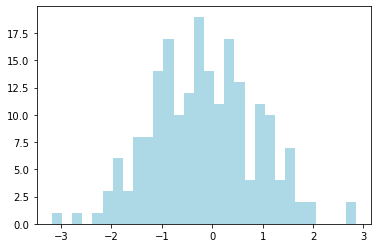

In [37]:

size = 200 
stand_div = 1
mean_std = 0
sample = st.norm.rvs(mean_std, stand_div, size)
plot.hist(sample, density=False, histtype='stepfilled', color='lightblue', bins = 30)
plot.show()

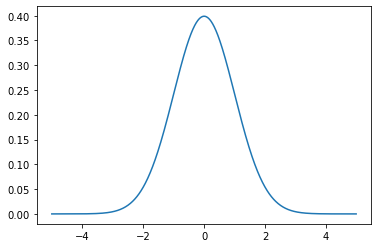

In [59]:
# compare to normal pdf of normal distr
my_axis = np.arange(-5,5, 0.01)
mean = 0
stddv = 1
plot.plot(my_axis, st.norm.pdf(my_axis, mean, stddv))
#doesn't really seem familiar to the sample so far 

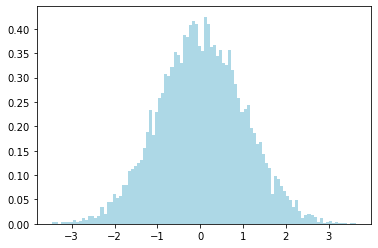

(0.008873204297838222, 0.04177027683686768)
(0.00893201990443793, 0.04171146123026798)


In [60]:
# now change the size to 10000 and see the changes(maybe not...)

size = 10000
stand_div = 1
mean_std = 0
sample = st.norm.rvs(mean_std, stand_div, size)
plot.hist(sample, density=True, histtype='stepfilled', color='lightblue', bins = 100 )
plot.show()
#now tis is much better
#Now try the confidence interval for mean
def z_sc(alpha_score):
    return st.norm.isf(alpha_score/2)
def smpl_mean(sample):
    return np.mean(sample)
def my_interval(smpl, stddv, alpha):
    _mean  = smpl_mean(sample)
    leng = len(sample)
    zscore = z_sc(alpha)
    return (_mean - stddv*zscore/np.sqrt(leng),_mean + stddv*zscore/np.sqrt(leng) )
print(my_interval( sample, 1, 0.1)) # 90% sonfidence interval
# now let's use this exact sample's std ( assuming the population std is unknown)

def t_sc(freedom, alpha):
    return st.t.isf(alpha/2, freedom)
def sample_std(sample, n):
     return np.sqrt((np.sum(sample**2) - n * smpl_mean(sample)**2) / (n - 1)) # formula for sample std
def my_interval_unknown(sample, alpha):
    mean_ = smpl_mean(sample)
    leng = len(sample)
    tsc =t_sc(leng -1, alpha)
    samplestd = sample_std(sample, leng)
    return(mean_ - tsc * samplestd / np.sqrt(leng), mean_ + tsc * samplestd / np.sqrt(leng))
print(my_interval_unknown(sample, 0.1))
#pretty close estimation for this sizes ( plug in any task on this to check...)

### Confidence interval for variance


In [66]:
def critical_value_chi(df, tail):
    
    return st.chi2.isf(tail, df)

def confidendce_interval_chi(sample, alpha):
    
    n              = len(sample)
    s              = sample_std(sample, n)
    chi_crit_right = critical_value_chi(n-1, alpha / 2)
    chi_crit_left  = critical_value_chi(n-1, 1 - alpha / 2)
    
    lower_bound = (n-1) * s**2 / chi_crit_right
    upper_bound = (n-1) * s**2 / chi_crit_left
    
    return (lower_bound, upper_bound)
print(confidendce_interval_chi(sample, 0.1))

(0.9700025104070529, 1.0162010211225787)


###  Population Proportion confidence interval

In [72]:
def sample_proportion(sample): # p 
    
    return np.mean(sample)

def estimated_sample_proportion_std(sample):
    
    p_hat = sample_proportion(sample)
    return np.sqrt(p_hat * (1 - p_hat) / len(sample))

def confidendce_interval_proportion(sample, alpha):
    
    p_hat  = sample_proportion(sample)
    ese    = estimated_sample_proportion_std(sample)
    z_crit = z_sc(alpha)
    
    lower_bound = p_hat - z_crit * ese
    upper_bound = p_hat + z_crit * ese
    
    return (lower_bound, upper_bound)


def confidendce_interval_proportion_difference(sample_x, sample_y, alpha):
    
    p_hat_x  = sample_proportion(sample_x)
    ese_x    = estimated_sample_proportion_std(sample_x)
    
    p_hat_y  = sample_proportion(sample_y)
    ese_y    = estimated_sample_proportion_std(sample_y)
    
    p_hat_xy = p_hat_x - p_hat_y
    ese_xy   = np.sqrt(ese_x**2 + ese_y**2)
    
    z_crit   = z_sc(alpha)
    
    lower_bound = p_hat_xy - z_crit * ese_xy
    upper_bound = p_hat_xy + z_crit * ese_xy
    
    return (lower_bound, upper_bound)
SIZE = 40
SAMPLE_X = st.bernoulli.rvs(0.4, size=SIZE)
SAMPLE_Y = st.bernoulli.rvs(0,6, size=SIZE)


print(confidendce_interval_proportion(sample, 0.1))
#print(confidendce_interval_proportion_difference(SAMPLE_X, SAMPLE_Y, 0.1))

(0.022737668189197174, 0.02790581294550873)
(nan, nan)


/var/folders/kt/8pnx4rb10372fz63y2z655nh0000gn/T/ipykernel_90617/1841526069.py:9: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(p_hat * (1 - p_hat) / len(sample))
